In [1]:
import tushare as ts
import pandas as pd
import numpy as np

In [2]:
pro = ts.pro_api()

In [4]:
df_JS_HS300_A= pro.fund_nav(ts_code='000176.OF')#嘉实沪深300指数研究增强

In [7]:
df_JS_HS300_A['end_date'] = pd.to_datetime(df_JS_HS300_A['end_date'])

In [8]:
order=['end_date', 'unit_nav', 'accum_nav']

In [9]:
df_JS_HS300_A = df_JS_HS300_A[order]

In [10]:
df_index = pd.read_csv('index-15.csv')

In [11]:
df_index.rename(columns={'时间':'date','沪深300':'HS300','中证500':'ZZ500','中证1000':'ZZ1000'},inplace = True)

In [12]:
df_index = df_index.drop(index=range(1290,1294))

In [13]:
df_index['date'] = pd.to_datetime(df_index['date'])

In [14]:
df_JS_HS300_A['accum_nav-1'] = df_JS_HS300_A['accum_nav'].shift(-1)

In [15]:
df_JS_HS300_A['ret'] = (df_JS_HS300_A['accum_nav']-df_JS_HS300_A['accum_nav-1'])/df_JS_HS300_A['accum_nav-1']

In [16]:
df_JS_HS300_A.drop(columns='accum_nav-1',inplace = True)

In [17]:
df_JS_HS300_A=df_JS_HS300_A[df_JS_HS300_A['end_date']>=pd.to_datetime('20150101')]

In [18]:
df_JS_HS300_A.rename(columns={'end_date':'date'},inplace = True)

In [19]:
df_JS_HS300_A=df_JS_HS300_A.merge(df_index)

In [20]:
df_JS_HS300_A['ret']=df_JS_HS300_A['ret']*100

In [21]:
df_JS_HS300_A_test = df_JS_HS300_A[df_JS_HS300_A['date']>pd.to_datetime('20191231')]

In [22]:
df_JS_HS300_A_train = df_JS_HS300_A[df_JS_HS300_A['date']<=pd.to_datetime('20191231')]

In [23]:
import turicreate
from turicreate import SFrame

In [25]:
JS_HS300A = turicreate.linear_regression.create(SFrame(df_JS_HS300_A_train) ,target='ret',features=['HS300'],validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 1196

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 1.002510     | 3.583403           | 0.260703                        |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [26]:
df_JS_HS300_A_train['pre-ret']=JS_HS300A.predict(SFrame(df_JS_HS300_A_train))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
df_JS_HS300_A_test['pre-ret']=JS_HS300A.predict(SFrame(df_JS_HS300_A_test))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
def R2(y_test, y_true):
    return 1 - ((y_test - y_true)**2).sum() / ((y_true - y_true.mean())**2).sum()

In [29]:
 R2(df_JS_HS300_A_train['pre-ret'],df_JS_HS300_A_train['ret'])

0.9688356888151858

In [30]:
R2(df_JS_HS300_A_test['pre-ret'],df_JS_HS300_A_test['ret'])

0.993375926572883

In [31]:
R2(df_JS_HS300_A_train['HS300'],df_JS_HS300_A_train['ret'])

0.9664026252983179

In [32]:
R2(df_JS_HS300_A_test['HS300'],df_JS_HS300_A_test['ret'])

0.9913922376689351

In [33]:
import pygal

OSError: no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so': dlopen(libcairo.so, 2): image not found
cannot load library 'libcairo.2.dylib': dlopen(libcairo.2.dylib, 2): image not found
cannot load library 'libcairo-2.dll': dlopen(libcairo-2.dll, 2): image not found

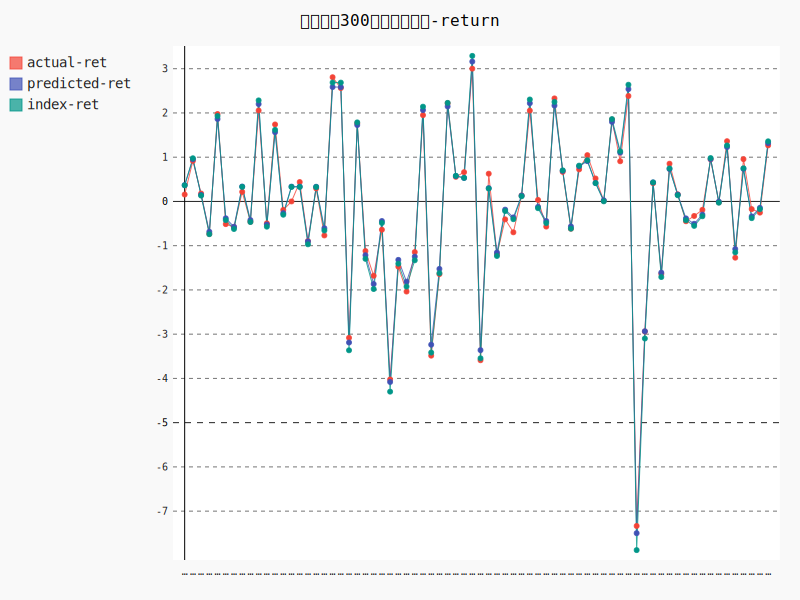

In [35]:
line_chart_JS_HS300_A= pygal.Line()
line_chart_JS_HS300_A.title = '嘉实沪深300指数研究增强-return'
line_chart_JS_HS300_A.x_labels = df_JS_HS300_A_test.date
line_chart_JS_HS300_A.add('actual-ret',df_JS_HS300_A_test.ret)
line_chart_JS_HS300_A.add('predicted-ret',df_JS_HS300_A_test['pre-ret'])
line_chart_JS_HS300_A.add('index-ret',df_JS_HS300_A_test['HS300'])